In [17]:
# %matplotlib notebook
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torchsummary import summary
from ipynb.fs.full.Preprocess_Image import preprocess_image_for_inference

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model0 = self.get_vgg()
        
        self.model1_1 = self.get_layer_1(38)
        self.model2_1 = self.get_layer_T(38)
        self.model3_1 = self.get_layer_T(38)
        self.model4_1 = self.get_layer_T(38)
        self.model5_1 = self.get_layer_T(38)
        self.model6_1 = self.get_layer_T(38)
        
        self.model1_2 = self.get_layer_1(19)
        self.model2_2 = self.get_layer_T(19)
        self.model3_2 = self.get_layer_T(19)
        self.model4_2 = self.get_layer_T(19)
        self.model5_2 = self.get_layer_T(19)
        self.model6_2 = self.get_layer_T(19)
        
    def forward(self, x):
        x_vgg = self.model0(x)
        
        layer1_paf = self.model1_1(x_vgg)
        layer1_confidence_map = self.model1_2(x_vgg)
        concat = torch.cat([layer1_paf, layer1_confidence_map, x_vgg], 1)
        
        layer2_paf = self.model2_1(concat)
        
        layer2_confidence_map = self.model2_2(concat)
        concat = torch.cat([layer2_paf, layer2_confidence_map, x_vgg], 1)
        
        layer3_paf = self.model3_1(concat)
        layer3_confidence_map = self.model3_2(concat)
        concat = torch.cat([layer3_paf, layer3_confidence_map, x_vgg], 1)
        
        layer4_paf = self.model4_1(concat)
        layer4_confidence_map = self.model4_2(concat)
        concat = torch.cat([layer4_paf, layer4_confidence_map, x_vgg], 1)
        
        layer5_paf = self.model5_1(concat)
        layer5_confidence_map = self.model5_2(concat)
        concat = torch.cat([layer5_paf, layer5_confidence_map, x_vgg], 1)
        
        layer6_paf = self.model6_1(concat)
        layer6_confidence_map = self.model6_2(concat)
        
        return layer6_paf, layer6_confidence_map
    def get_vgg(self):
        vgg_model = nn.Sequential(nn.Conv2d(3, 64, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(64, 64, 3, 1, 1),
                                nn.ReLU(),
                                nn.MaxPool2d(2, 2, 0),
                                nn.Conv2d(64, 128, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 3, 1, 1),
                                nn.ReLU(),
                                nn.MaxPool2d(2, 2, 0),
                                nn.Conv2d(128, 256, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(256, 256, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(256, 256, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(256, 256, 3, 1, 1),
                                nn.ReLU(),
                                nn.MaxPool2d(2, 2, 0),
                                nn.Conv2d(256, 512, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(512, 512, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(512, 256, 3, 1, 1),
                                nn.ReLU(),
                                nn.Conv2d(256, 128, 3, 1, 1),
                                nn.ReLU())
        return vgg_model
    def get_layer_1(self, num_last_layer_channel):
        first_layer_model = nn.Sequential(nn.Conv2d(128, 128, 3 ,1 ,1),
                                          nn.ReLU(),
                                          nn.Conv2d(128, 128, 3 ,1 ,1),
                                          nn.ReLU(),
                                          nn.Conv2d(128, 128, 3 ,1 ,1),
                                          nn.ReLU(),
                                          nn.Conv2d(128, 512, 1 ,1 ,0),
                                          nn.ReLU(),
                                          nn.Conv2d(512, num_last_layer_channel, 1 ,1 ,0),
                                          nn.ReLU())
        return first_layer_model

    def get_layer_T(self, num_last_layer_channel):
        layer_T = nn.Sequential(nn.Conv2d(185, 128, 7 ,1 ,3),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 7 ,1 ,3),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 7 ,1 ,3),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 7 ,1 ,3),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 7 ,1 ,3),
                                nn.ReLU(),
                                nn.Conv2d(128, 128, 1 ,1 ,0),
                                nn.ReLU(),
                                nn.Conv2d(128, num_last_layer_channel, 1 ,1 ,0),
                                nn.ReLU())
        return layer_T

In [19]:
model = Net()
model.cuda()
# print("Model's state dictionary : ")
# for model_param_name , value in model.state_dict().items():
#     print(model_param_name , "\t", value.shape)

Net(
  (model0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU()
    (18): MaxPool2d(kernel_size=2, stride=2, padding=0, d

In [20]:
model.load_state_dict(torch.load('pose_model.pth'))

<All keys matched successfully>

In [21]:
# create a function that return the paf and confidence map given an image
def run_model(img, scale = 1, preprocess = False, fx = 1, fy = 1):
    model.eval()
    
    if(preprocess):
        img = preprocess_image_for_inference(img, scale)
        # this function mainly returns the cropped image and padded to some value as I have seen in many implementstions on github
        # this preprocessing is however optional
    else:
        img = cv2.resize(img ,None, fx = fx, fy = fy)
        img = img.astype(np.float32)
        img = img/255. - 0.5
        img = torch.from_numpy(np.transpose(img, [2, 0, 1])[np.newaxis , ...].astype(np.float32))
        img = img.cuda().float()
    
    # Now run the image through the whole network
    with torch.no_grad():
        paf, confidence_map = model(img)
    
    # remove the excess dimension from the outputs i.e np.squeeze
    # load the results back to cpu , detach the result from the graph and convert it back to numpy array for further processing
    paf = np.squeeze(paf.cpu().detach().numpy())
    confidence_map = np.squeeze(confidence_map.cpu().detach().numpy())
    
    return paf, confidence_map


In [74]:
# model.eval()
# img = cv2.imread('images/self1.jpg')
# # plt.imshow(img[:, : ,[2,1,0]])
# # img_processed = preprocess_image_for_inference(img)
# # print(img_processed.shape)
# # img = img.cpu()
# # plt.imshow((np.transpose(np.squeeze(img), (1, 2 ,0))*255)[:, :, [2, 1, 0]])
# # plt.show()
# img_not_processed = cv2.resize(img ,None, fx = 0.25, fy = 0.25)
# img_not_processed = img_not_processed.astype(np.float32)
# img_not_processed = img_not_processed/255. - 0.5
# img_not_processed = torch.from_numpy(np.transpose(img_not_processed, [2, 0, 1])[np.newaxis , ...].astype(np.float32))
# print(img_not_processed.shape)
# img_not_processed = img_not_processed.cuda().float()
# with torch.no_grad():
#     paf , confidence_map = model(img_not_processed)

torch.Size([1, 3, 1024, 576])


In [89]:
# confidence_map = confidence_map.cpu()
# confidence_map = confidence_map.detach().numpy()

# paf = paf.cpu()
# paf = paf.detach().numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

confidence_map shape is :  (1, 19, 128, 72)
paf shape is :  (1, 38, 128, 72)


<IPython.core.display.Javascript object>


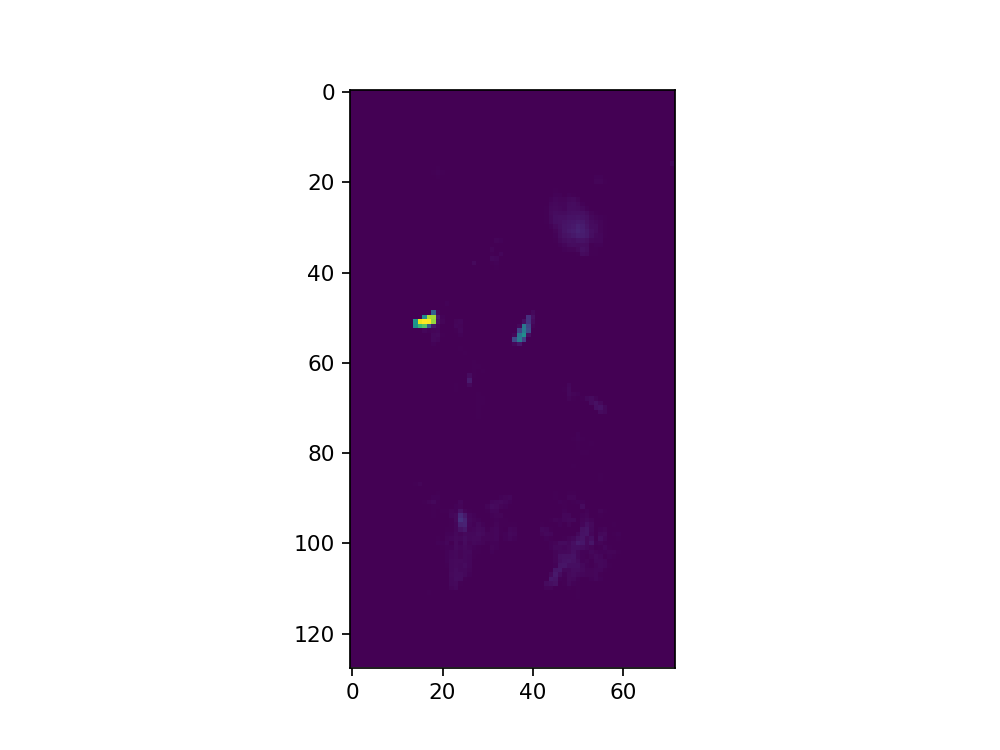

In [94]:

# print("confidence_map shape is : ", confidence_map.shape)
# print("paf shape is : ", paf.shape)
# layers_combined = np.squeeze(confidence_map)[0]
# for i in range(1, 18):
#     layers_combined +=np.squeeze(confidence_map)[i]
    
# plt.imshow(cv2.resize(img, (confidence_map.shape[3], confidence_map.shape[2]))[:, :, [2,1,0]])
# plt.imshow(np.squeeze(con_np)[1], alpha = 0.5)


<IPython.core.display.Javascript object>


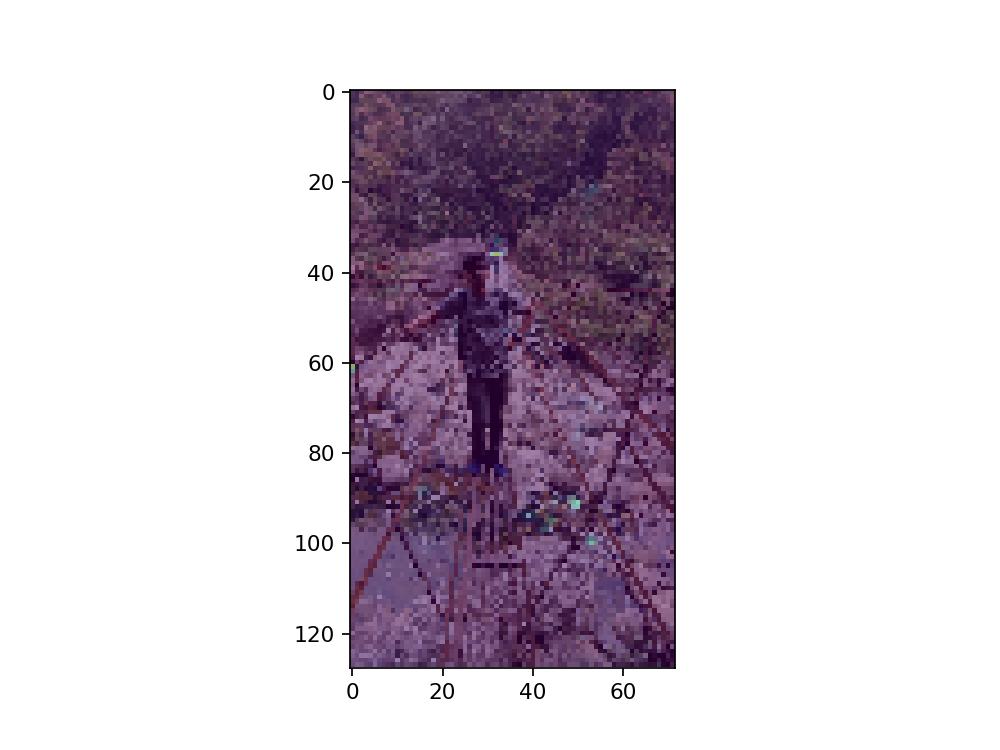

In [99]:
# from numpy import ma
# U = paf[:,16,:,:]# * -1
# plt.imshow(np.squeeze(U))
# plt.imshow(cv2.resize(img, (confidence_map.shape[3], confidence_map.shape[2]))[:, :, [2,1,0]], alpha = 0.5)
# plt.show()
# V = paf[:,:,17]
# X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
# M = np.zeros(U.shape, dtype='bool')
# M[U**2 + V**2 < 0.5 * 0.5] = True
# U = ma.masked_array(U, mask=M)
# V = ma.masked_array(V, mask=M)

# # 1
# plt.figure()
# plt.imshow(img[:,:,[2,1,0]], alpha = .5)
# s = 5
# Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
#                scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(20, 20)

<IPython.core.display.Javascript object>


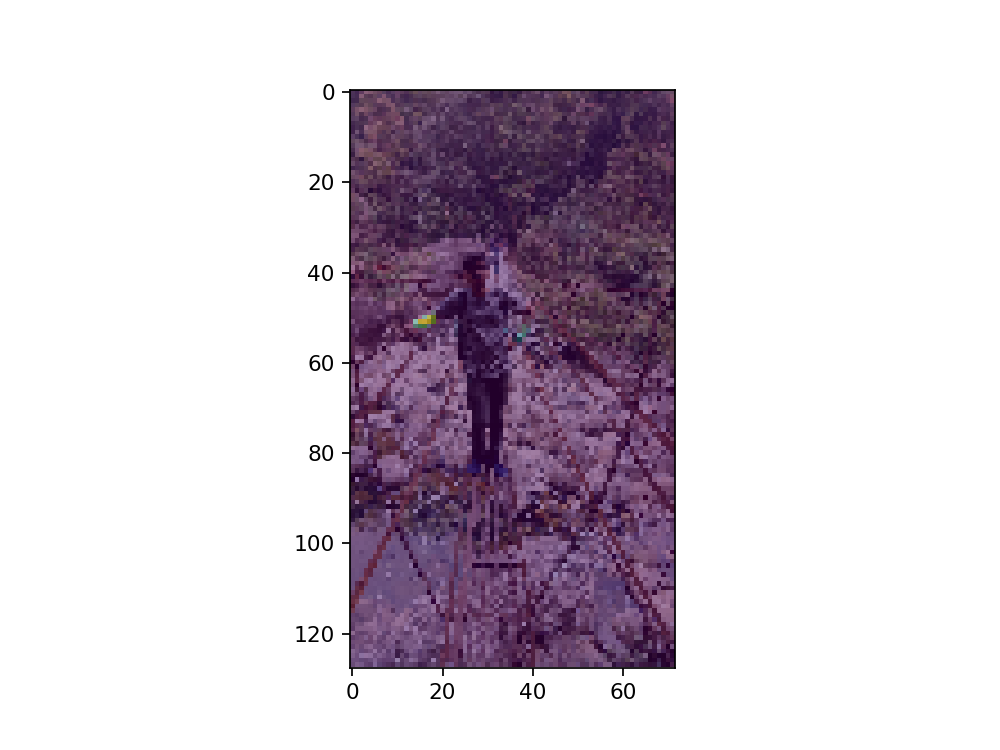

In [100]:
# plt.imshow(np.squeeze(paf[:, 17, :, :]))
# plt.imshow(cv2.resize(img, (confidence_map.shape[3], confidence_map.shape[2]))[:, :, [2,1,0]], alpha = 0.5)